
DESCRIPTON OF THE TASK
----------

This dataset is composed of 1200 samples with 25 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of a Support-
Vector Machine (implemented by sklearn.svm.LinearSVC) with that of a Random
Forest (implemented by sklearn.ensemble.RandomForestClassifier). Try to optimize
both algorithms' parameters and determine which one is best for this dataset. At
the end of the analysis, you should have chosen an algorithm and its optimal set
of parameters: write this choice explicitly in the conclusions of your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-
presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).


## Setup: import all the necessary modules

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import  randint

np.random.seed(42)

##### In this notebook I am going to proceed step by step implementing all the necessary parts of a ML Pipeline. Finally, everything will be summed up in a Full Pipeline. 

# 1) Extract the data. 

In [5]:
data = pd.read_csv("mldata_0023120534.csv")

data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,0,1,-8.851254,-7.878613,-15.448974,-12.209390,-8.206218,-10.586233,-9.177392,-4.222681,...,-5.601868,-7.763878,-8.739786,-4.755464,-1.420193,-13.291618,-12.862103,-11.333368,-5.610509,-10.372217
1,1,1,-4.839239,-3.911122,-2.729871,3.145013,0.752653,-2.605349,-2.713124,-2.472971,...,-3.561890,-1.194488,-4.597855,-4.801335,-3.966267,-3.172806,-3.699427,-4.273948,-5.002768,-2.297542
2,2,1,-4.692646,-4.944327,-6.022839,-0.050118,0.292146,-3.688137,-3.995203,0.670949,...,-0.223768,-2.004490,-4.257084,0.556925,5.116230,-3.989985,-0.821385,-6.146429,0.312067,-1.113371
3,3,1,-1.784131,0.943119,3.154259,6.026776,7.772430,-3.371465,-0.005341,11.111721,...,6.900411,0.909814,6.621659,7.180219,12.698634,2.556840,9.290284,-4.141341,2.864158,5.396148
4,4,0,-14.258900,-9.687371,-21.173259,-15.790940,-14.114644,-22.643769,-17.714741,-11.516369,...,-21.907535,-14.086769,-14.080845,-15.281241,-10.560493,-27.021274,-19.909218,-16.875315,-14.497669,-11.413384


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1200 non-null   int64  
 1   label       1200 non-null   int64  
 2   feature_1   1200 non-null   float64
 3   feature_2   1200 non-null   float64
 4   feature_3   1200 non-null   float64
 5   feature_4   1200 non-null   float64
 6   feature_5   1200 non-null   float64
 7   feature_6   1200 non-null   float64
 8   feature_7   1200 non-null   float64
 9   feature_8   1200 non-null   float64
 10  feature_9   1200 non-null   float64
 11  feature_10  1200 non-null   float64
 12  feature_11  1200 non-null   float64
 13  feature_12  1200 non-null   float64
 14  feature_13  1200 non-null   float64
 15  feature_14  1200 non-null   float64
 16  feature_15  1200 non-null   float64
 17  feature_16  1200 non-null   float64
 18  feature_17  1200 non-null   float64
 19  feature_18  1200 non-null  

#### The dataset presents 25  numerical features and a label that is an integer taking either zero or one as values. Hence, we are in the case of a binary classification problem. There are no categorical or missing values and 1200 attributes(rows) for each feature.

In [7]:
data.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,0.505833,-0.811819,0.304200,-0.239809,1.718227,0.887951,0.366871,-0.228424,1.271201,...,-0.156272,1.690527,-0.103863,0.711903,2.299922,-1.624817,3.086496,-0.140450,0.464344,0.329135
std,346.554469,0.500174,11.753870,8.199131,13.426673,8.815367,8.998173,14.077922,11.314514,9.145007,...,13.041176,11.615005,9.546092,10.739708,9.346980,15.997794,12.145490,13.755866,10.266467,7.124022
min,0.000000,0.000000,-42.743141,-24.951056,-51.324049,-28.309084,-32.455070,-50.432912,-39.180953,-29.573919,...,-49.384679,-44.310153,-33.239196,-37.258311,-30.294041,-58.938604,-39.253841,-52.341452,-35.299264,-24.332550
25%,299.750000,0.000000,-7.905140,-5.258244,-8.818717,-3.945827,-5.001477,-7.995769,-7.180050,-4.632925,...,-8.022253,-4.982362,-6.364132,-6.047115,-3.672028,-11.023959,-4.238107,-8.812018,-6.327789,-4.068176
50%,599.500000,1.000000,-0.895513,0.419355,0.119356,2.572145,1.446903,0.588517,0.043984,1.528476,...,0.290158,2.033829,0.013000,0.887500,2.240180,-1.771538,3.713595,-0.083233,0.301132,0.575247
75%,899.250000,1.000000,6.692620,6.027429,8.984163,7.823354,7.079259,9.908620,7.561189,7.747734,...,8.265655,9.649975,6.581316,8.233124,8.314797,8.766203,11.130130,9.230666,7.474772,5.134502
max,1199.000000,1.000000,35.844507,26.751384,47.292142,32.115493,36.548050,50.613089,38.165664,32.487480,...,49.767797,40.492964,30.521835,35.941756,35.458375,62.799181,46.371036,42.905722,38.292192,26.093787


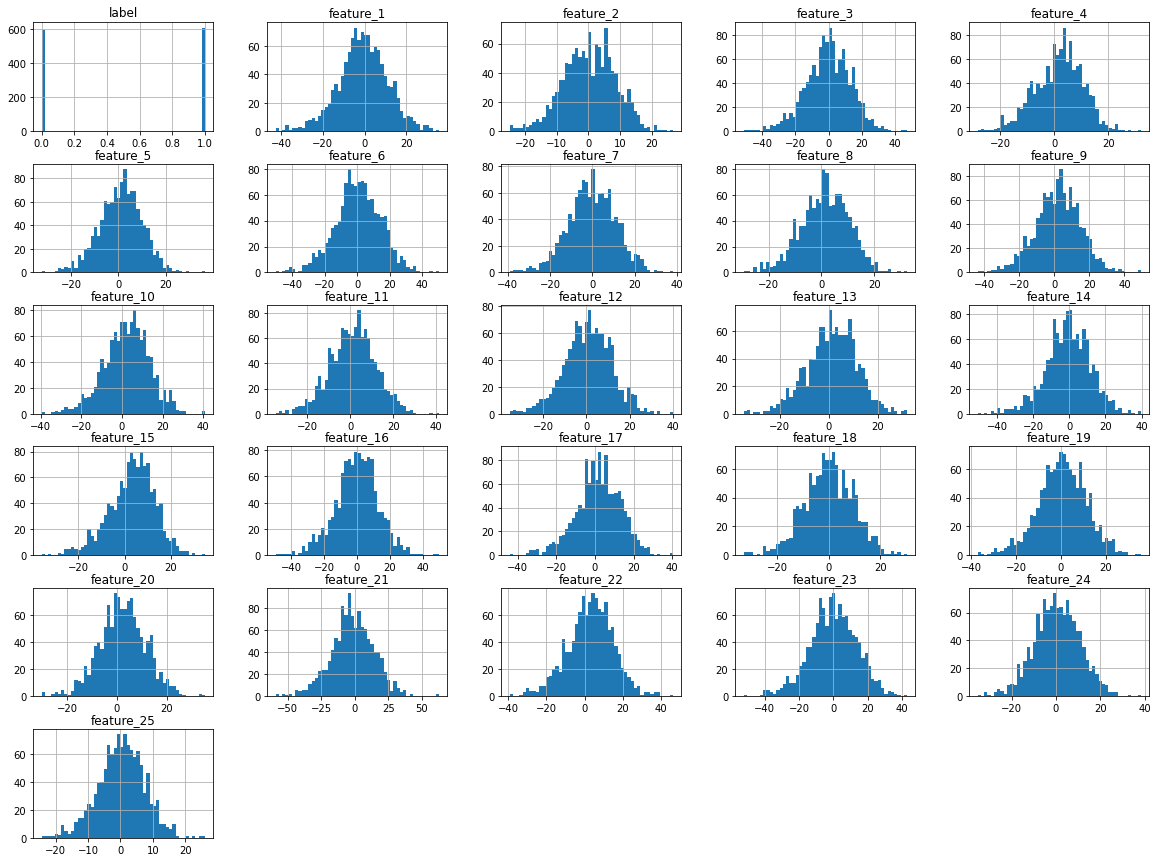

In [8]:
data_to_plot = data.copy()
data_to_plot.drop("Unnamed: 0", axis=1, inplace=True)
%matplotlib inline
data_to_plot.hist(bins = 50, figsize = (20,15))
plt.show()

#### As shown by the plots, our features are all almost normally distributed with the mean around zero. Though, for consistency, we are going to scale all the features even if we expect the results not to improve significantly. Regarding the label, we can immediately grasp that we have a one-to-one proportion (between 0 and 1) that yields a BALANCED dataset. Further graphs and explanations below:

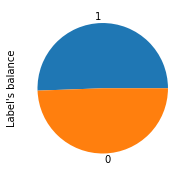

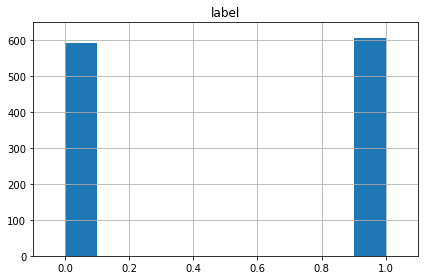

In [9]:
targets = pd.DataFrame(data, columns = ["label"])
fig= plt.figure(figsize=(8,3))
a= targets.value_counts(normalize=True).plot.pie(labels = [1,0])
plt.ylabel("Label's balance")
b = targets.hist()
plt.axis([-0.1, 1.1,0,650])
 
                
plt.tight_layout()
plt.show()

### I show the correlation among the data to get additional info on our dataset even if it is crucial to remove it in the linear regression and not so important(actually wrong) in the classification case. In fact,  if we remove features, we lose the spacial information needed to correctly classify our data.


In [10]:
corr_matrix = data_to_plot.corr()
corr_matrix.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
label,1.000000,-0.102269,-0.045183,-0.021353,-0.004418,-0.040058,-0.105096,-0.107409,-0.008950,-0.064274,...,-0.037816,-0.099825,-0.038248,-0.079606,-0.068056,-0.033549,0.001568,-0.090921,-0.082997,-0.056604
feature_1,-0.102269,1.000000,0.880623,0.944223,0.716673,0.869064,0.932605,0.926000,0.840104,0.813262,...,0.922961,0.946786,0.909571,0.918279,0.746890,0.890160,0.817911,0.934354,0.898490,0.799296
feature_2,-0.045183,0.880623,1.000000,0.912835,0.622093,0.887464,0.872987,0.938697,0.927427,0.803475,...,0.834445,0.893724,0.958560,0.937875,0.783988,0.858760,0.802156,0.926880,0.921184,0.820775
feature_3,-0.021353,0.944223,0.912835,1.000000,0.829426,0.928823,0.932500,0.920387,0.910303,0.871456,...,0.934179,0.953587,0.950555,0.928372,0.759601,0.928845,0.884769,0.926473,0.905286,0.842163
feature_4,-0.004418,0.716673,0.622093,0.829426,1.000000,0.814669,0.754472,0.689531,0.713114,0.833304,...,0.791067,0.790773,0.698962,0.689257,0.687954,0.749599,0.873383,0.633554,0.669830,0.806935


Text(0.5, 1.0, 'Correlation Matrix')

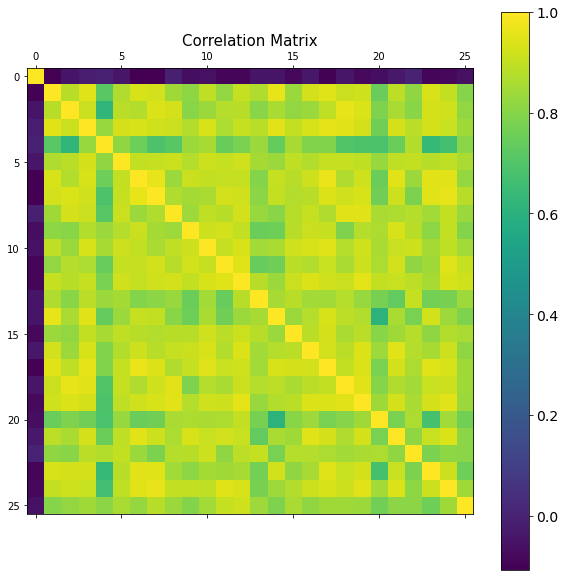

In [11]:
# Heatmap version of the correlation matrix

f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum = f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=15)

### Thanks to the plot, we can immediately grasp that there is correlation among the features whereas the labels are almost uncorrelated with the features. This is also numerically shown below:

In [12]:
corr_matrix["label"].sort_values(ascending= False)

label         1.000000
feature_22    0.001568
feature_4    -0.004418
feature_8    -0.008950
feature_3    -0.021353
feature_21   -0.033549
feature_16   -0.037816
feature_18   -0.038248
feature_5    -0.040058
feature_13   -0.044904
feature_2    -0.045183
feature_14   -0.046726
feature_25   -0.056604
feature_10   -0.059359
feature_9    -0.064274
feature_20   -0.068056
feature_19   -0.079606
feature_24   -0.082997
feature_15   -0.084397
feature_11   -0.089611
feature_23   -0.090921
feature_12   -0.093081
feature_17   -0.099825
feature_1    -0.102269
feature_6    -0.105096
feature_7    -0.107409
Name: label, dtype: float64

#### As expected, the correlation is almost meaningless in defining the output since we are in a classification problem in which the features are defining whether one object may or may not belong to a class. However, it is always interesting to give it a look since it still gives us a sense of how features contribute more to the final decision. This argument will be mentioned again later in the notebook.


## 2) Data cleaning and preparation. 


## Train - Test split

#### A necessary passage is that of splitting the whole dataset into training and test set. These two allow us to fit the learning algorithm first, and then measure the accuracy of the model-predicted values with respect to the test values that act as fresh new data.

In [13]:
from sklearn.model_selection import train_test_split
features = data_to_plot.copy()

features.drop("label", axis = 1 , inplace = True)
features
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

### Standardization:

In [14]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
sc_x_train = scaler.fit_transform(x_train)
sc_x_test = scaler.fit_transform(x_test)

In [15]:
sc_x_test.shape

(240, 25)

#### Since the SVM is sensitive to scales and outliers, we'd better normalize our data. The rescaling is done after the train-test split and on features only. It is important that we first split and then standardize the two sets separately even though it is a very debated topic in ML literature. The idea is that we want the test set to act as if it was new data and standardizing everything together would bias this new data towards the training ones.

## PCA for visualization

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 

X_train_pca = pca.fit_transform(sc_x_train)
X_train_pca

array([[-3.04179628, -0.81379781],
       [ 2.13600554, -1.24522637],
       [ 7.96994941,  0.12995263],
       ...,
       [-0.4293783 , -1.59105592],
       [-0.12601707, -0.3401881 ],
       [ 6.41724441,  0.27229661]])

In [17]:
pca.explained_variance_

array([21.84752351,  0.89492192])

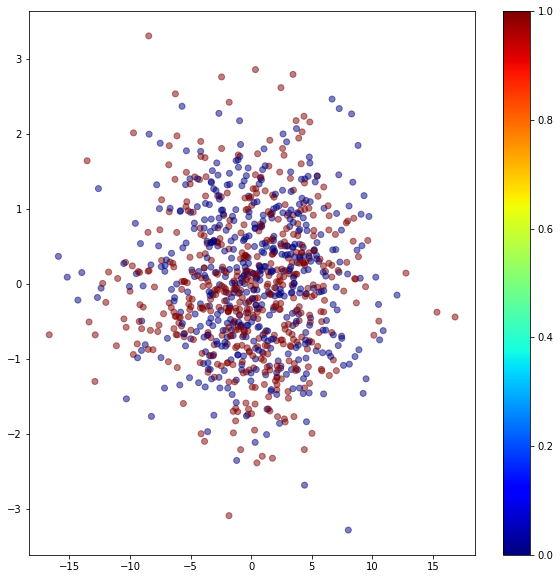

In [18]:
plt.figure(figsize=(10,10))

plt.set_cmap('jet')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], alpha=0.5, c = np.array(y_train))
cbar = plt.colorbar()
cbar.set_alpha(1)
cbar.draw_all()  

#### Just to visualize our data into a 2D space, I used PCA and I obtained that, besides the inaccuracy of the data positions shrinked from 25 to 2 dimensions, indeed our realizations are shown to be divided into 2 classes that the colorbar defines as 0 and 1.

# Models and performances: SVM

In [19]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics

svm_clf1 = LinearSVC(C=1e-1, loss="hinge",max_iter = 5000,  random_state=42)

svm_clf1.fit(sc_x_train,y_train.values.ravel())
y_pred = svm_clf1.predict(sc_x_test)
print(y_pred)

print("Train accuracy:", metrics.accuracy_score(y_train, svm_clf1.predict(sc_x_train)))
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))

[1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1]
Train accuracy: 0.7
Test accuracy: 0.6333333333333333


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_train, svm_clf1.predict(sc_x_train)))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       466
           1       0.68      0.78      0.73       494

    accuracy                           0.70       960
   macro avg       0.70      0.70      0.70       960
weighted avg       0.70      0.70      0.70       960



As shown in this report, we achieve a recall of about 78% which means we have 78 true positive out of 100 correcly classified. Accuracy on training is found to be almost 70% which is something acceptable. When it comes to f1_score, we are guaranteed that a 73% is a good balance of recall and precision. Overall, given the problem at hand, this results are not bad.

# Hyperparameter tuning - SVM

### Throughout the notebook I opted for a Randomized Search cross validation because the Grid Search was computationally unfeasible and I did not  know which parameters to manually test. Hence, a bit of stochasticity could be acceptable.

In [21]:
from sklearn.model_selection import RandomizedSearchCV


param_distribs = {
        'C': np.linspace(0.1, 50,100),
        'tol' : [1e-5,1e-4,1e-3,1e-2,1e-1],
        'max_iter' : np.linspace(10000,100000,100)
 }

rnd_search = RandomizedSearchCV(svm_clf1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

In [22]:
result_svm = rnd_search.fit(sc_x_train, y_train.values.ravel())
result_svm_pred = result_svm.predict(sc_x_test)


print('Best Score: %s' % result_svm.best_score_)
print('Best Hyperparameters: %s' % result_svm.best_params_)

print("Train accuracy:", metrics.accuracy_score(y_train, result_svm.predict(sc_x_train)))
print("Test accuracy:", metrics.accuracy_score(y_test, result_svm_pred))
results = result_svm.best_params_

Best Score: -0.290625
Best Hyperparameters: {'tol': 1e-05, 'max_iter': 58181.818181818184, 'C': 6.148484848484848}
Train accuracy: 0.728125
Test accuracy: 0.675


In [23]:
print(result_svm_pred)

[1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1
 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1]


In [24]:
svm_clf2 = LinearSVC(C= results["C"],
                     loss="hinge", 
                     max_iter = results["max_iter"], 
                     tol = results["tol"],
                     random_state=42)


svm_clf2.fit(sc_x_train,y_train.values.ravel())
y_train_p = svm_clf2.predict(sc_x_train)
print(classification_report(y_train,y_train_p))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       466
           1       0.73      0.76      0.74       494

    accuracy                           0.73       960
   macro avg       0.73      0.73      0.73       960
weighted avg       0.73      0.73      0.73       960



### Using cross validation to get the best accuracy, given we have the best hyperparameters.

In [25]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_clf2, sc_x_train, y_train.values.ravel(), cv=5, scoring="accuracy")
cv_scores

array([0.71875   , 0.73958333, 0.67708333, 0.70833333, 0.703125  ])

In [26]:
print(cv_scores.mean())

0.7093750000000001


#### In this case, cross validation is just used to get different scores so that I could conclude this is almost the best we can get out of SVM. In addition, thanks to the report we can obtain an overview of the training performance and accuracy which describe a quite balanced bias-variance tradeoff.

# Models and performances: Random Forest

### In this case, even though the Random Forest algorithm is invariant to scaling since what matters is only data order, I preferred to train and test on scaled values for consistency with the whole project. Of course I could do it since rescaling is not affecting the results in any way.

In [27]:
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=300,
                                 max_depth = 15,
                                 n_jobs=-1, random_state=42)

rnd_clf.fit(sc_x_train, y_train.values.ravel())

y_test_pred_rf = rnd_clf.predict(sc_x_test)

print("Train accuracy:", metrics.accuracy_score(y_train, rnd_clf.predict(sc_x_train)))
print("Test accuracy:", metrics.accuracy_score(y_test, y_test_pred_rf))

Train accuracy: 1.0
Test accuracy: 0.6958333333333333


### As above, we use cross validation to get the best accuracy possible . However, we first need to find the hyperparameters that yield such a result and that solve the overfitting issues.


# Hyperparameter tuning - RANDOM FOREST

### First trial: Trying to reduce overfitting:

In [28]:
param_distribs = {
    'n_estimators': randint(low=1, high=100),
    'max_leaf_nodes': randint(low= 2, high = 20),
    'max_depth': randint(low= 1, high = 10)    }

forest_reg_trial = RandomForestClassifier(n_jobs = -1 , random_state=42)

rnd_search_trial = RandomizedSearchCV(forest_reg_trial, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

result_forest_trial = rnd_search_trial.fit(sc_x_train, y_train.values.ravel())
result_forest_train_trial = result_forest_trial.predict(sc_x_train)
result_forest_pred_trial = result_forest_trial.predict(sc_x_test)

print('Best Score: %s' % result_forest_trial.best_score_)
print('Best Hyperparameters: %s' % result_forest_trial.best_params_)
print("Train accuracy:", metrics.accuracy_score(y_train,result_forest_train_trial))
print("Test accuracy:", metrics.accuracy_score(y_test, result_forest_pred_trial))

Best Score: -0.3447916666666667
Best Hyperparameters: {'max_depth': 6, 'max_leaf_nodes': 13, 'n_estimators': 89}
Train accuracy: 0.8291666666666667
Test accuracy: 0.65


In [29]:
print(classification_report(y_train,result_forest_train_trial))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       466
           1       0.82      0.86      0.84       494

    accuracy                           0.83       960
   macro avg       0.83      0.83      0.83       960
weighted avg       0.83      0.83      0.83       960



### After many trials, in order to further optimize the code, I realized that even though we occur in overfitting, if we try to impose restriction on the trees that compose the forest, we are not able to decrease our generalization error; instead it worsens. Hence, we should accept the fact that the model is overfitting such as it happens for many neural networks (double descent loss) thus concluding that such strong overfitting is not evil per se given we can still achieve the highest possible test accuracy.

## Second trial: Accepting overfitting

In [30]:
param_distribs = {
    'n_estimators': randint(low=300, high=1000),
    'max_leaf_nodes': randint(low= 100, high = 500),
    'max_depth': randint(low= 10, high = 100)
    }

forest = RandomForestClassifier(n_jobs = -1 , random_state=42)

rnd_search = RandomizedSearchCV(forest, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

result_forest = rnd_search.fit(sc_x_train, y_train.values.ravel())
#result_forest_train = result_forest.predict(sc_x_train)
result_forest_pred = result_forest.predict(sc_x_test)

print('Best Score: %s' % result_forest.best_score_)
print('Best Hyperparameters: %s' % result_forest.best_params_)
#print("Train accuracy:", metrics.accuracy_score(y_train,result_forest_train))
print("Test accuracy:", metrics.accuracy_score(y_test, result_forest_pred))


Best Score: -0.27395833333333336
Best Hyperparameters: {'max_depth': 73, 'max_leaf_nodes': 376, 'n_estimators': 460}
Test accuracy: 0.6916666666666667


In [31]:
results_rf2 = result_forest.best_params_
forest2 = RandomForestClassifier(n_estimators = results_rf2["n_estimators"],
                                    max_leaf_nodes=results_rf2["max_leaf_nodes"],
                                    max_depth = results_rf2["max_depth"],
                                    n_jobs = -1 , random_state=42)

result_forest2 = forest2.fit(sc_x_train, y_train.values.ravel())
result_forest_train2 = result_forest2.predict(sc_x_train)
result_forest_pred2 = result_forest2.predict(sc_x_test)
print("Train accuracy:", metrics.accuracy_score(y_train,result_forest_train2))
print("Test accuracy:", metrics.accuracy_score(y_test, result_forest_pred2))

Train accuracy: 1.0
Test accuracy: 0.6916666666666667


In [32]:
print(classification_report(y_train,result_forest_train2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       466
           1       1.00      1.00      1.00       494

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [33]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(forest2, sc_x_train, y_train.values.ravel(), cv=8, scoring="accuracy")
cv_scores

array([0.76666667, 0.71666667, 0.74166667, 0.70833333, 0.76666667,
       0.69166667, 0.73333333, 0.69166667])

In [34]:
print(cv_scores.mean())

0.7270833333333333


### Since a tuned random forest grants a better performance on generalization, with an average accuracy of about 73%, we consider this as our final choice for solving the task. Hence, it will be part of our final full pipeline.

### To get a sense of the behavior of our Forest, I plot Train against Validation error doing some manual cross validation.

In [35]:
Depth_values = np.arange(1,30)
train_accuracy = np.zeros(29)
test_accuracy = np.zeros(29)
for depth in Depth_values:   
    rf_clf = RandomForestClassifier(n_estimators = results_rf2["n_estimators"],
                                    max_leaf_nodes=results_rf2["max_leaf_nodes"],
                                    max_depth = depth,
                                    n_jobs = -1 , random_state=42)
    rf_clf.fit(sc_x_train,y_train.values.ravel())
    train_accuracy[depth-1] = rf_clf.score(sc_x_train, y_train.values.ravel())
    test_accuracy[depth-1] = rf_clf.score(sc_x_test, y_test.values.ravel())
    

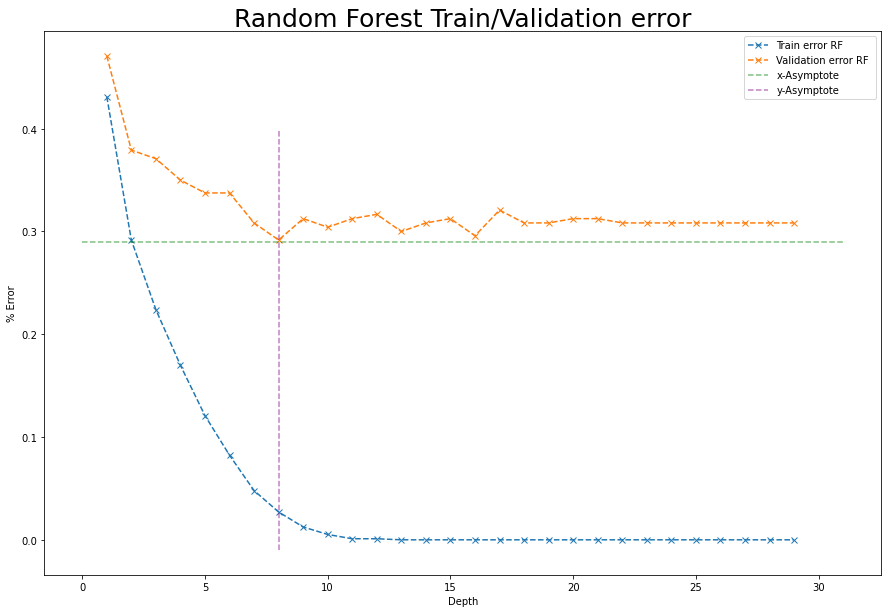

In [36]:
plt.figure(figsize = (15,10))
plt.plot(Depth_values,1 - train_accuracy, "x--")
plt.plot(Depth_values, 1- test_accuracy, "x--")
plt.plot(np.arange(0,32),np.repeat(0.29,32), "--",c = "green",alpha = 0.5 )
plt.plot(np.repeat(8,10),np.linspace(-0.01,0.4,10), "--",c = "purple",alpha = 0.5 )
plt.title("Random Forest Train/Validation error",fontsize = 25)
plt.xlabel("Depth")
plt.ylabel("% Error")
plt.legend(["Train error RF","Validation error RF ", "x-Asymptote","y-Asymptote"])


### What we can extrapolate from the graph is that the model is overfitting almost immediately. The high variance behavior is obtained from the gap between the two curves. In addition, we can get that the loss has a double descent since after the minimum at depth = 8, it starts increasing before getting back at a 0.29/0.3 train error. 

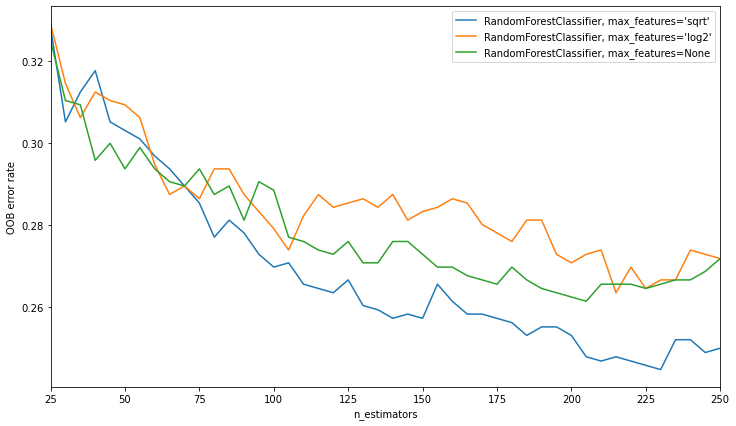

In [37]:
from collections import OrderedDict
RANDOM_STATE = 123
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

## max_features = The number of features to consider when looking for the best split:
## If “sqrt”, then max_features=sqrt(n_features).
## If “log2”, then max_features=log2(n_features).
## If None, then max_features=n_features.



# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 25
max_estimators = 250

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train.values.ravel())

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        
plt.figure(figsize=(12,7))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### This final additional plot has been developed using the Out-Of-Bag evaluation which gives a quick way to estimate the number of ensambles and the generalization error without any need of k-fold cross-validation.                                     As compared to the validation score OOB score is computed on data that was not necessarily used in the analysis of the model since when bootstrapping, not every sample is taken into consideration for each DT; whereas for calculation validation score, a part of the original training dataset is actually set aside before training the models. Additionally, the OOB score is calculated using only a subset of DTs not containing the OOB sample in their bootstrap training dataset. While the validation score is calculated using all the DTs of the ensemble. The idea is that, mostly when we don't have big datasets, we can use OOB score to avoid sparing a fraction of the dataset for validation and still get a sort of validation on up to 36% of the dataset even without leaving it apart. However, given the different techniques adopted, we should not compare OOB and validation directly as they were equivalent.

## Full Pipeline 

In [38]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
        ('scaler', scaler),
    ("forest", forest2)
])
pipeline.fit(x_train,y_train.values.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestClassifier(max_depth=73, max_leaf_nodes=376,
                                        n_estimators=460, n_jobs=-1,
                                        random_state=42))])

In [39]:
pip_res = pipeline.predict(x_test)
pip_train = pipeline.predict(x_train)

print("Train accuracy:", metrics.accuracy_score(y_train,pip_train))
print("Test accuracy:", metrics.accuracy_score(y_test, pip_res))

Train accuracy: 1.0
Test accuracy: 0.725


### With max_depth=73, max_leaf_nodes=376 and n_estimators=460, we obtain the best result (72.5%) among those tested throughout the project. Before concluding I wanted to try some possible improvements of the aforementioned models, even if out of the scope of the task. 

# Additional task before conclusion: improving previous models' performances.

### First trial: PCA dimensionality reduction

In [40]:
pca = PCA(n_components = 25)
X_train_pca = pca.fit_transform(sc_x_train)
print(f"percentage of variability explained by each feature: {pca.explained_variance_ratio_}")
cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cum_var_ratio

percentage of variability explained by each feature: [8.72990627e-01 3.57595884e-02 2.53272749e-02 1.87809587e-02
 1.31135318e-02 8.51506709e-03 6.21412350e-03 5.39566692e-03
 3.51629018e-03 3.02633563e-03 2.73197760e-03 1.65588368e-03
 1.16048072e-03 7.09864945e-04 4.40390357e-04 2.71489310e-04
 1.72592509e-04 1.08414945e-04 7.85644346e-05 3.08774830e-05
 5.96415124e-33 2.67807618e-33 2.14865913e-33 1.93530043e-33
 1.72182330e-33]


array([0.87299063, 0.90875022, 0.93407749, 0.95285845, 0.96597198,
       0.97448705, 0.98070117, 0.98609684, 0.98961313, 0.99263946,
       0.99537144, 0.99702733, 0.99818781, 0.99889767, 0.99933806,
       0.99960955, 0.99978214, 0.99989056, 0.99996912, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [41]:
components = np.where(0.99<cum_var_ratio)[0]
print(f"Components necessary to retain 99% of the variance: {components[0]}.")

Components necessary to retain 99% of the variance: 9.


### According to PCA, we can retain 99% of the whole dataset variability into the first 9 principal components. This can speed up a lot our algorithms and facilitate the search of an optimal solution to our problem. But if we plot the explained variance we observe that....

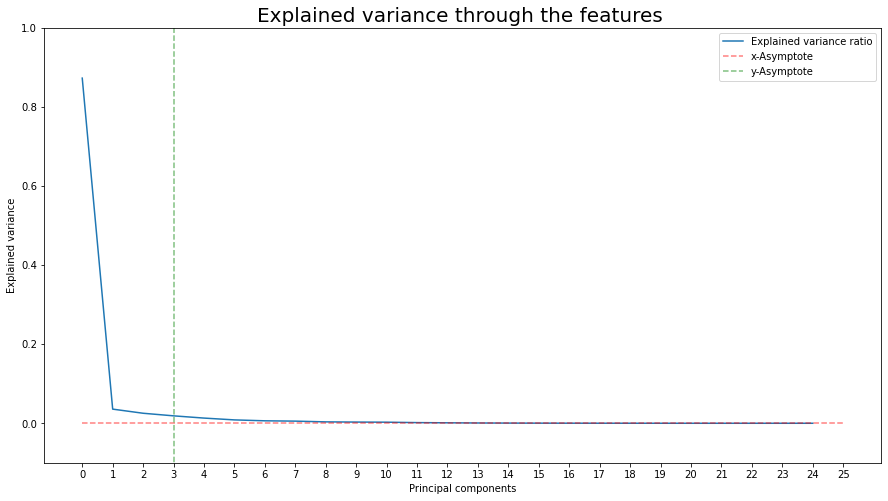

In [42]:
plt.figure(figsize=(15, 8))
plt.plot(pca.explained_variance_ratio_)
plt.plot(np.arange(0,26),np.zeros(26), "--",c = "red",alpha = 0.5 )
plt.plot(np.repeat(3,27),np.arange(-1,26), "--",c = "green",alpha = 0.5 )
plt.xlabel('Principal components')
plt.ylabel('Explained variance');
_ = plt.ylim([-0.1,1])
plt.xticks(np.arange(0,26))
plt.title("Explained variance through the features ",fontsize = 20)
plt.legend(["Explained variance ratio", "x-Asymptote","y-Asymptote"])

### ... that the largest fraction( 95%) of the explained variability is retained among the first 3 principal components. Hence, we can lose a bit of information to get a dramatic computational improvement. 

In [43]:
components = np.where(0.95<cum_var_ratio)[0]
print(f"Components necessary to retain 95% of the variance: {components[0]}.")

Components necessary to retain 95% of the variance: 3.


#### Below I show which features are actually among the first 3/9 principal components:

In [44]:
indexes = pd.DataFrame(sc_x_train, columns=x_train.columns)
feature_scores = pd.Series(forest2.feature_importances_, index=indexes.columns).sort_values(ascending=False)

feature_scores


feature_13    0.053660
feature_20    0.049285
feature_22    0.049149
feature_21    0.047784
feature_1     0.047593
feature_3     0.044311
feature_11    0.042909
feature_4     0.042877
feature_8     0.042625
feature_15    0.041422
feature_25    0.040823
feature_12    0.039543
feature_14    0.039439
feature_10    0.038820
feature_7     0.038143
feature_17    0.038013
feature_16    0.037767
feature_5     0.035927
feature_24    0.035035
feature_6     0.034139
feature_23    0.033497
feature_9     0.033434
feature_2     0.033229
feature_19    0.032312
feature_18    0.028264
dtype: float64

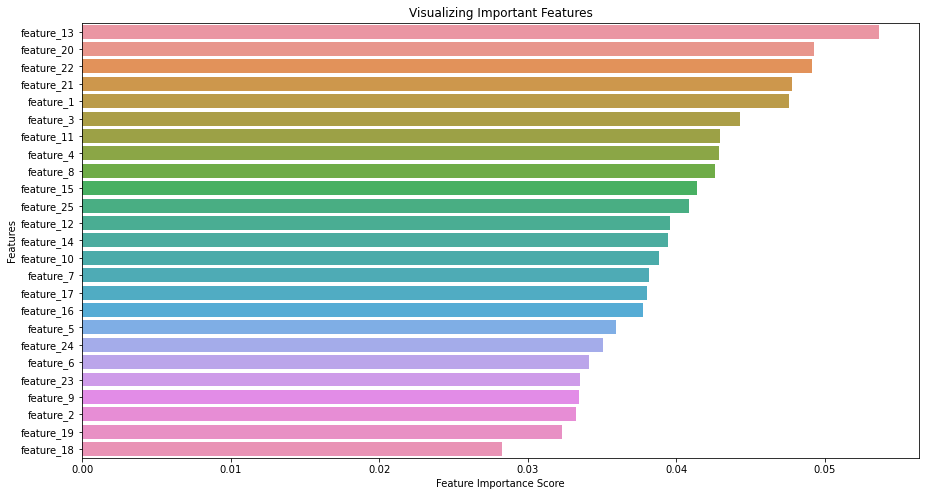

In [45]:
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')


plt.title("Visualizing Important Features")

plt.show()

### Thanks to one of the peculiarities of Random Forests I could define the features that contribute more to the final prediction. Similar argument has been touched upon in the corr_matrix cell.

In [46]:
X_train_pca = PCA(n_components = 3).fit_transform(sc_x_train)
X_test_pca = PCA(n_components = 3).fit_transform(sc_x_test)

Text(0.5, 0.98, '3D Data representation')

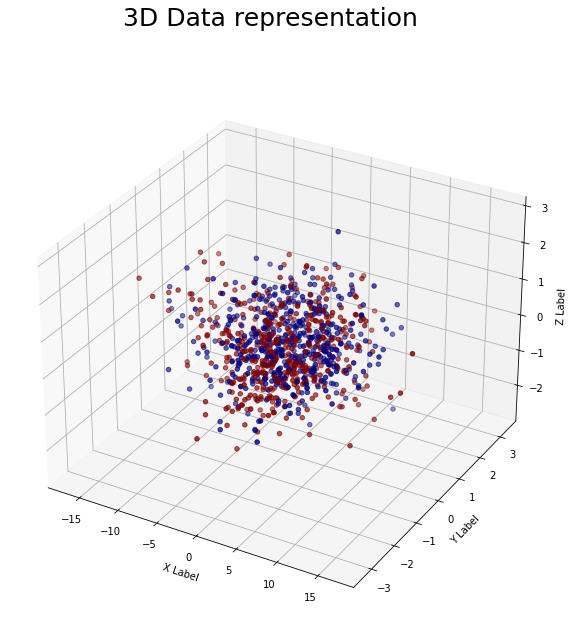

In [47]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_pca[:,0], X_train_pca[:,1],X_train_pca[:,2],c = np.array(y_train))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

fig.suptitle("3D Data representation", fontsize = 25)

## PCA + Random forest 

In [48]:
param_distribs = {
    'n_estimators': randint(low=300, high=1000),
    'max_leaf_nodes': randint(low= 100, high = 500),
    'max_depth': randint(low= 10, high = 100)    }

forest_reg_pca = RandomForestClassifier(n_jobs = -1 , random_state=42)

rnd_search = RandomizedSearchCV(forest_reg_pca, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

result_forest = rnd_search.fit(X_train_pca, y_train.values.ravel())
result_forest_train = result_forest.predict(X_train_pca)
result_forest_pred = result_forest.predict(X_test_pca)

print('Best Score: %s' % result_forest.best_score_)
print('Best Hyperparameters: %s' % result_forest.best_params_)
print("Train accuracy:", metrics.accuracy_score(y_train,result_forest_train))
print("Test accuracy:", metrics.accuracy_score(y_test, result_forest_pred))


Best Score: -0.4666666666666667
Best Hyperparameters: {'max_depth': 73, 'max_leaf_nodes': 376, 'n_estimators': 460}
Train accuracy: 1.0
Test accuracy: 0.5166666666666667


In [49]:
param_distribs = {
    'n_estimators': randint(low=300, high=1000),
    'max_leaf_nodes': randint(low= 100, high = 500),
    'max_depth': randint(low= 2, high = 15)    }

forest_reg_pca = RandomForestClassifier(n_jobs = -1 , random_state=42)

rnd_search = RandomizedSearchCV(forest_reg_pca, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

result_forest = rnd_search.fit(X_train_pca, y_train.values.ravel())
result_forest_train = result_forest.predict(X_train_pca)
result_forest_pred = result_forest.predict(X_test_pca)

print('Best Score: %s' % result_forest.best_score_)
print('Best Hyperparameters: %s' % result_forest.best_params_)
print("Train accuracy:", metrics.accuracy_score(y_train,result_forest_train))
print("Test accuracy:", metrics.accuracy_score(y_test, result_forest_pred))


Best Score: -0.4645833333333333
Best Hyperparameters: {'max_depth': 7, 'max_leaf_nodes': 408, 'n_estimators': 643}
Train accuracy: 0.821875
Test accuracy: 0.5083333333333333


## PCA + SVM

In [50]:
param_distribs = {
        'C': np.linspace(5, 100,100),
        'tol' : np.linspace(1e-5, 1,1000),
        'max_iter' : np.linspace(5000,100000,1000)
 }

rnd_search = RandomizedSearchCV(svm_clf1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

In [51]:
result_svm = rnd_search.fit(X_train_pca, y_train.values.ravel())
result_svm_pred = result_svm.predict(X_test_pca)

print('Best Score: %s' % result_svm.best_score_)
print('Best Hyperparameters: %s' % result_svm.best_params_)

print("Train accuracy:", metrics.accuracy_score(y_train, result_svm.predict(X_train_pca)))
print("Test accuracy:", metrics.accuracy_score(y_test, result_svm_pred))
results = result_svm.best_params_.copy()

Best Score: -0.4447916666666666
Best Hyperparameters: {'tol': 0.2822894594594595, 'max_iter': 88873.87387387388, 'C': 58.73737373737374}
Train accuracy: 0.5666666666666667
Test accuracy: 0.49166666666666664


### In both cases we end up with worse results. According to PCA literature, one may think that this technique is the most powerful tool we have for working with infinitely large datasets as in the social media environment; though it is not like that. In fact, researching more on the topic, I discovered that using PCA before a classification model produces strong drawbacks: PCA can lose some spatial information which is important for classification, so the classification accuracy decreases. Since this argument surprised me, I wanted to discover more and brought it up in the project.

## Second trial: Random Forest using boosting.

#### After PCA's failure, I thought about using boosting instead of bagging aiming at improving accuracy while reducing overfitting. 

In [52]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=4, random_state=42)

param_distribs = {
    'n_estimators': randint(low=100, high=600)
    }

rnd_search = RandomizedSearchCV(clf, param_distributions=param_distribs,
                                n_iter=10, cv=8, scoring='neg_mean_squared_error', random_state=42)

boost_res = rnd_search.fit(sc_x_train, y_train.values.ravel()) 
boosting_pred = boost_res.predict(sc_x_test)
boosting_train = boost_res.predict(sc_x_train)

print('Best Score: %s' % boost_res.best_score_)
print('Best Hyperparameters: %s' % boost_res.best_params_)
print("Train accuracy:", metrics.accuracy_score(y_train,boosting_train))
print("Test accuracy:", metrics.accuracy_score(y_test, boosting_pred))

Best Score: -0.3291666666666666
Best Hyperparameters: {'n_estimators': 288}
Train accuracy: 0.928125
Test accuracy: 0.6625


### However, not even this solution is getting to optimality. Hence, I can finally conclude that the Random Forest after hyperparameter tuning is the best I can achieve.

## Third trial: SVM using non-linear kernels.

### My last trial choice is based on the data distribution. Given the largest variance is kept in the first 3 components, it means that the 3D plotted shown above gives a very good representation of the actual position of the data. Since that, I realized that such a cloud of random data could not be separated by a linear SVM and I tried different ones.

In [53]:
from sklearn.svm import SVC
svm_additional = SVC(C=1e-1,kernel = "rbf",max_iter = 5000,  random_state=42)

svm_additional.fit(sc_x_train,y_train.values.ravel())
y_pred = svm_additional.predict(sc_x_test)

print("Train accuracy:", metrics.accuracy_score(y_train, svm_additional.predict(sc_x_train)))
print("Test accuracy:", metrics.accuracy_score(y_test, y_pred))

Train accuracy: 0.6020833333333333
Test accuracy: 0.5833333333333334


In [54]:
param_distribs = {
        'C': np.linspace(0.0, 10,100),
        'tol' : np.linspace(1e-5, 1,1000),
        'max_iter' : np.linspace(5000,100000,1000),
        "kernel" : ["rbf","sigmoid", "poly"]
 }

rnd_search_additional = RandomizedSearchCV(svm_additional, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search_additional.fit(sc_x_train,y_train.values.ravel())

print('Best Score: %s' % rnd_search_additional.best_score_)
print('Best Hyperparameters: %s' % rnd_search_additional.best_params_)

Best Score: -0.20729166666666665
Best Hyperparameters: {'tol': 0.21021810810810815, 'max_iter': 49409.4094094094, 'kernel': 'rbf', 'C': 8.383838383838384}


In [55]:
y_rand_pred = rnd_search_additional.predict(sc_x_test)
print("Train accuracy:", metrics.accuracy_score(y_train, rnd_search_additional.predict(sc_x_train)))
print("Test accuracy:", metrics.accuracy_score(y_test, y_rand_pred))


Train accuracy: 0.8729166666666667
Test accuracy: 0.7916666666666666


In [56]:
prediction = pd.DataFrame(y_rand_pred)
prediction.columns = ["boh"]
prediction

,boh
0,1
1,1
2,0
3,0
4,0
...,...
235,1
236,1
237,1
238,0


In [75]:
indices = y_rand_pred.nonzero()
data.iloc[indices]

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,0,1,-8.851254,-7.878613,-15.448974,-12.209390,-8.206218,-10.586233,-9.177392,-4.222681,...,-5.601868,-7.763878,-8.739786,-4.755464,-1.420193,-13.291618,-12.862103,-11.333368,-5.610509,-10.372217
1,1,1,-4.839239,-3.911122,-2.729871,3.145013,0.752653,-2.605349,-2.713124,-2.472971,...,-3.561890,-1.194488,-4.597855,-4.801335,-3.966267,-3.172806,-3.699427,-4.273948,-5.002768,-2.297542
6,6,0,8.707497,10.878838,9.044991,3.780855,4.425053,12.197684,9.143713,9.094988,...,7.268592,9.067771,9.487913,12.298227,13.386768,5.336951,16.915219,11.839722,9.470778,5.119768
7,7,0,-0.256066,3.281905,-3.292800,-6.403985,1.862486,0.988215,2.804190,1.344637,...,-3.224073,-1.266226,-0.928117,-0.718765,0.210339,-0.366971,-2.360413,4.165880,0.547974,-2.267353
8,8,1,15.108184,14.789266,16.937841,5.188787,13.720832,18.277989,18.653806,13.812526,...,12.329506,14.767255,18.147677,17.613257,10.777938,13.416061,18.231284,23.106430,14.623938,9.840320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,0,-6.011311,-2.768376,-14.392184,-10.469325,-4.837172,-7.784355,0.858892,-4.562981,...,-5.762329,-7.484477,-5.956600,-1.563712,-0.518975,-2.552492,-15.825135,-7.806922,-0.039820,1.950691
234,234,0,4.631811,10.338540,-1.282716,-6.358790,6.117437,17.027502,14.585606,7.996571,...,8.915694,10.057907,3.460315,13.863384,18.797901,14.749084,10.187967,13.141634,19.326558,5.893686
235,235,0,-9.184873,-11.070694,-10.743124,-0.500868,-8.480959,-12.771203,-15.793337,-10.986548,...,-13.290742,-9.741174,-8.659102,-14.702218,-5.152787,-23.163387,-0.495243,-16.452489,-12.436222,-8.139074
236,236,0,-0.272951,-1.940690,-4.418760,-3.479417,-1.488228,-5.426048,2.997503,-4.843997,...,-8.556773,-9.503197,2.404017,-4.981158,-5.221577,-15.636699,-9.373992,-4.466612,-5.264776,-2.726627


In [57]:
pd.DataFrame(svm_additional.predict(sc_x_train))

,0
0,1
1,1
2,0
3,0
4,0
...,...
955,1
956,1
957,1
958,1


In [58]:
print(classification_report(y_train,rnd_search_additional.predict(sc_x_train)))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       466
           1       0.86      0.89      0.88       494

    accuracy                           0.87       960
   macro avg       0.87      0.87      0.87       960
weighted avg       0.87      0.87      0.87       960



### I can finally conclude that this last trial, in which a radial basis function(gaussian kernel) is implemented, is what yields the best results with a test accuracy of almost 79% and it is not overfitting the training data. 

# Conclusions


As shown throughout the notebook, the best results in terms of test accuracy are obtained with the random forest that is able to reach the best accuracy with max_depth=73, max_leaf_nodes=376 and n_estimators=460.

First of all, we observed that the given dataset is balanced, we have in fact around 1/2 of the total datapoints for each label, but also that all the numerical features are pretty normally distributed, though scaling is needed for consistency.

A Linear SVM has been performed given the framework and the level of accuracy we got is around 67.5%, which is indeed reasonable for a classification algorithm. Despite having performed the optimization, we found out that the improvement on that is very tiny. Instead, we had better results with RandomForestClassifier, since the cross validated average accuracy was around 73% with max_depth=73, max_leaf_nodes=376 and n_estimators=460. At a first glance, the fact that the model overfits training data may appear as an obstacle to generalization error; however, after many trials, even imposing strong stopping conditions on the trees, it never improved. Given the overfitting reduction should aim at increasing the test accuracy but the opposite occurred, I could conclude that, as it is common in ML literature, overfitting should be accepted and not considered as evil per se.

I also added a full Pipeline to carry out the chosen solution in a compact form.

Finally, I extended a bit the project adding personal trials to improve the accuracy and complexity of the models. I first carried out a PCA dimensionality reduction to work in a lower dimensional feature space thus saving computational complexity and reducing the correlation among the features. The results obtained with only the first 3 principal components showed that it was not the right way of solving the problem(as previously explained). Then, I also tried to shift the Random Forest from bagging to boosting but, as expected, boosting is better in low-variance high-bias scenarios and hence it didn't reach the optimal solution. To conclude, I proposed a better solution adopting a non-linear SVM.

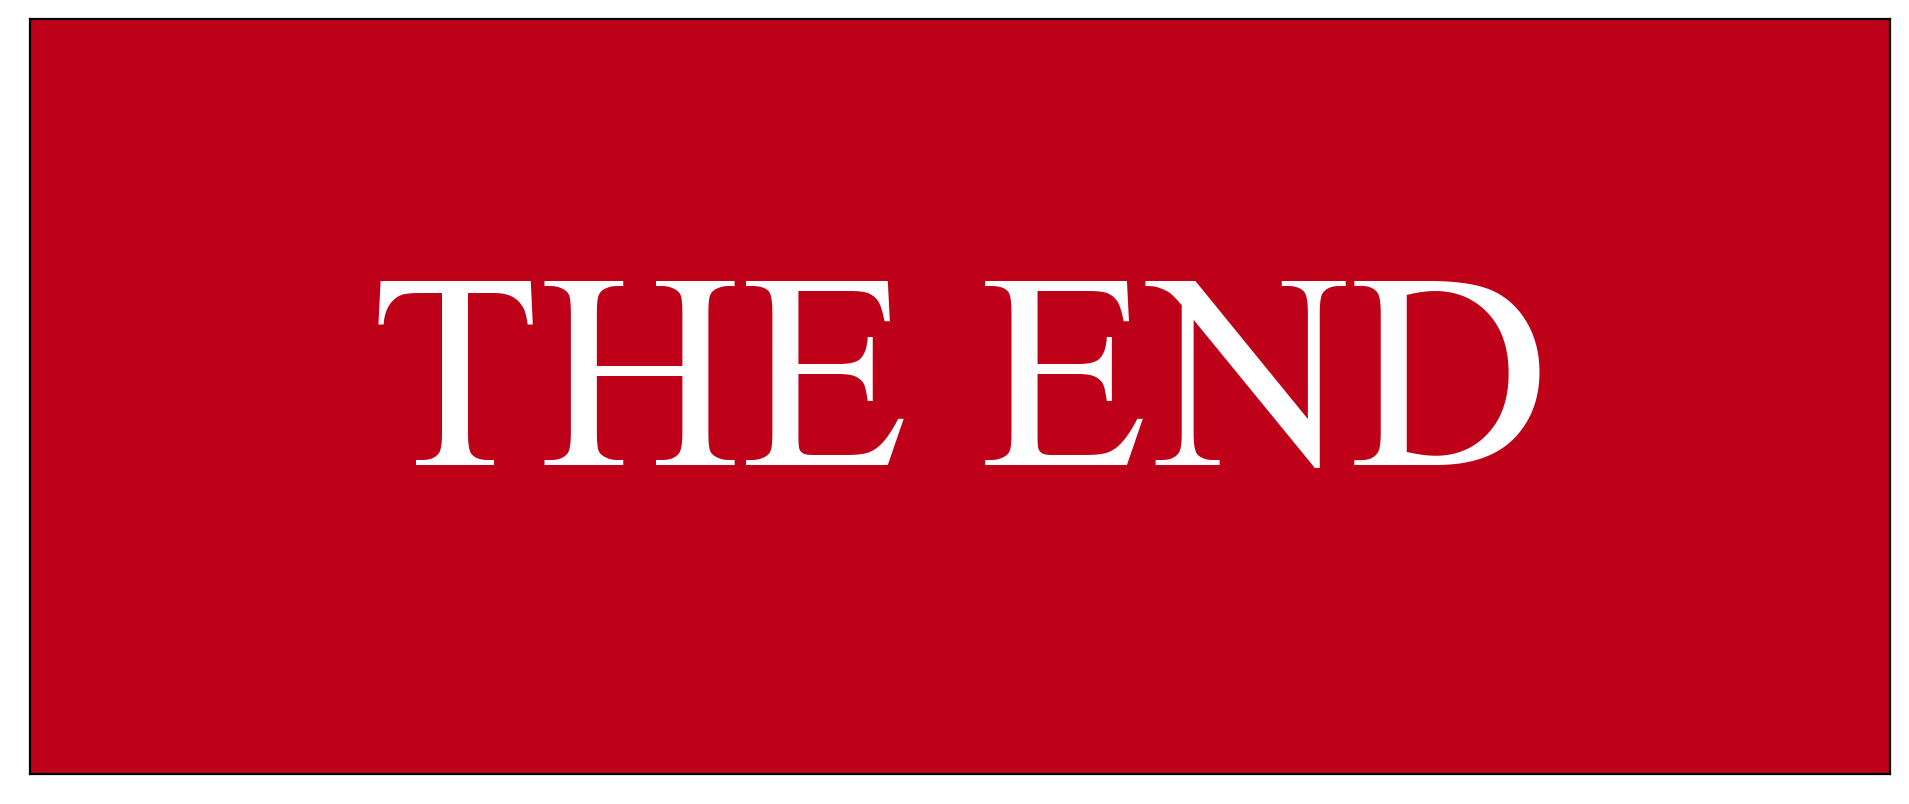

In [59]:
fig, axe = plt.subplots(figsize=(12, 5), dpi=200)
axe.text(0.5, 0.5, "THE END", c = "white", size=100,
         ha="center", va="center", fontfamily = "Times New Roman") 
axe.axes.get_xaxis().set_visible(False)
axe.axes.get_yaxis().set_visible(False)
axe.axes.set_facecolor('xkcd:scarlet')
plt.show()